# Analysis of Etherscan Data for Anomalies

In [36]:
#!pip install requests

In [1]:
# import requests
# import json

# api_key = 'JY98M77S59RTEPAZFQHH8Y9ETUQG7624ID'  # Replace with your actual API key
# pond_token_address = '0x423f4e6138E475D85CF7Ea071AC92097Ed631eea'

# # Etherscan API endpoint for ERC20 token transfer events
# offset = 1000  
# url = f"https://api.etherscan.io/api?module=account&action=tokentx&contractaddress={pond_token_address}&startblock=0&endblock=99999999&page=1&offset={offset}&sort=asc&apikey={api_key}"

# response = requests.get(url)
# data = json.loads(response.text)

# # Check if the request was successful
# if response.status_code == 200 and data['status'] == '1':
#     transfer_events = data['result']
# else:
#     print("Error fetching data:", data['message'])


In [2]:
import pandas as pd

df_transfers = pd.DataFrame(transfer_events)
df_transfers.to_csv('pond_token_transfers.csv', index=False)


In [3]:
df_transfers = pd.read_csv('pond_token_transfers.csv')

In [7]:
df_transfers.head()

,blockNumber,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
timeStamp,,,,,,,,,,,,,,,,,,
2023-08-04 20:39:59,17844056,0x8dbfcac996b9b96da0b17ada3b7e59b5159717a0c2ec...,0,0x85f0eabc911d39f16b544c5e053650316ad40e085a3f...,0x0000000000000000000000000000000000000000,0x423f4e6138e475d85cf7ea071ac92097ed631eea,0xc687f96d50f70e20bd2c038901bf13a6c5e6d78e,1.000000e+27,Pond Coin,PNDC,18,110,2185859,21086474497,2185859,11550352,deprecated,700582
2023-08-04 20:48:11,17844096,0x2260a53efeed48e5960bc4b3a00d06881e6bb814c4fb...,2,0xc31f63b30c1fd67f9816352a25c0310773c603ba4f1d...,0xc687f96d50f70e20bd2c038901bf13a6c5e6d78e,0x423f4e6138e475d85cf7ea071ac92097ed631eea,0xa06591252908576a0f64a8560ec0c8051782377c,2.998094e+23,Pond Coin,PNDC,18,166,6301118,25482292310,5165012,21821254,deprecated,700542
2023-08-04 20:49:47,17844104,0x3f4ecd35adda757e55e3787d0e757cca9eb5680727ae...,3,0xe4898ac17c7af3367c83ae30f1e0456b4f3cfb0af117...,0xc687f96d50f70e20bd2c038901bf13a6c5e6d78e,0x423f4e6138e475d85cf7ea071ac92097ed631eea,0xa06591252908576a0f64a8560ec0c8051782377c,1.998729e+23,Pond Coin,PNDC,18,75,240892,25543235606,177454,9044105,deprecated,700534
2023-08-04 20:51:11,17844111,0x8623d36f870449953ae8e34de2a41b558ad67f429f30...,10698,0xf8fe7d173bf964b299bdfdbe9783e075066a6f9842d9...,0xa06591252908576a0f64a8560ec0c8051782377c,0x423f4e6138e475d85cf7ea071ac92097ed631eea,0x5ca887615098c6b7409f18502f57538205c768d9,4.715752e+23,Pond Coin,PNDC,18,4,333767,58682479746,176256,1424824,deprecated,700527
2023-08-04 20:51:23,17844112,0xde15905767b891d3711de3c4fac505eadd5ddaae92ed...,10699,0xf1190cb853d4d021165e2bc82d5bb95105236837960f...,0xa06591252908576a0f64a8560ec0c8051782377c,0x423f4e6138e475d85cf7ea071ac92097ed631eea,0x5ca887615098c6b7409f18502f57538205c768d9,2.810713e+22,Pond Coin,PNDC,18,6,1027247,59167499934,635239,1653878,deprecated,700526


In [5]:
df_transfers['value'] = df_transfers['value'].astype(float)
print(df_transfers.describe())

        blockNumber     timeStamp         nonce         value  tokenDecimal  \
count  1.000000e+03  1.000000e+03  1.000000e+03  1.000000e+03        1000.0   
mean   1.784508e+07  1.691194e+09  8.457307e+04  3.670325e+27          18.0   
std    1.325280e+02  1.600947e+03  2.784849e+05  7.846428e+27           0.0   
min    1.784406e+07  1.691182e+09  0.000000e+00  1.686581e+15          18.0   
25%    1.784503e+07  1.691193e+09  9.400000e+01  6.426384e+23          18.0   
50%    1.784509e+07  1.691194e+09  3.870000e+02  5.507138e+25          18.0   
75%    1.784515e+07  1.691195e+09  2.935750e+03  2.754843e+27          18.0   
max    1.784523e+07  1.691196e+09  1.057060e+06  7.146399e+28          18.0   

       transactionIndex           gas      gasPrice       gasUsed  \
count       1000.000000  1.000000e+03  1.000000e+03  1.000000e+03   
mean          68.109000  3.152487e+05  2.130443e+10  1.850443e+05   
std           62.742934  5.026088e+05  3.377488e+10  3.466468e+05   
min         

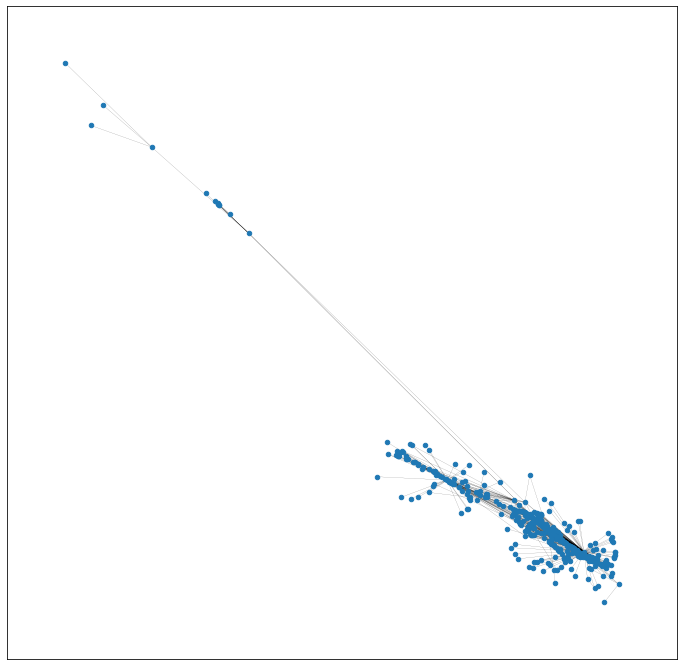

In [8]:
# Network Analysis

import networkx as nx

import matplotlib.pyplot as plt

# Create network graph

G = nx.Graph()

for _, row in df_transfers.iterrows():
    G.add_edge(row['from'], row['to'], weight=row['value'])

# Visualize the network
plt.figure(figsize = (12, 12))
nx.draw_networkx(G, with_labels = False, node_size = 20, width = 0.1)
plt.show()


In [11]:
# Cluster Analysis

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the data

df_features = df_transfers[['value']]
scaler = StandardScaler()
df_features_scaled = scaler.fit_transform(df_features)

In [13]:
# KMeans

kmeans = KMeans(n_clusters = 5, random_state = 0).fit(df_features_scaled)

df_transfers['cluster'] = kmeans.labels_

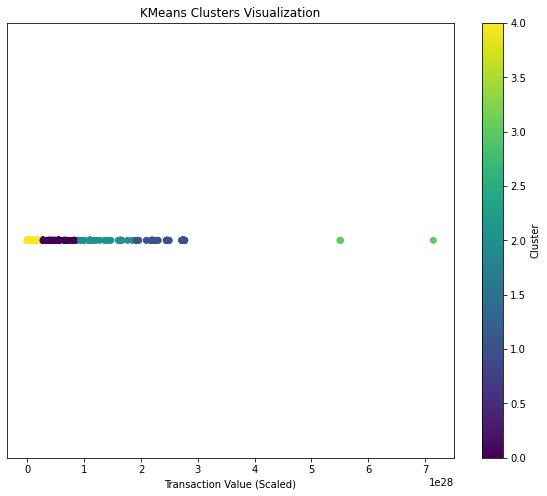

In [21]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df_transfers['value'], [0] * len(df_transfers), c=df_transfers['cluster'], cmap='viridis', marker='o')
plt.title('KMeans Clusters Visualization')
plt.xlabel('Transaction Value (Scaled)')
plt.yticks([])  # No meaningful y-axis values
plt.colorbar(label='Cluster')
plt.show()


In [23]:
# Isolation Forest

import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np
import plotly.express as px

# Assuming 'value', 'gas', 'gasPrice', and 'gasUsed' are the columns you want to analyze
features = ['value', 'gas', 'gasPrice', 'gasUsed']
df_features = df_transfers[features]

# Convert to appropriate data types if necessary
df_features['value'] = pd.to_numeric(df_features['value'], errors='coerce')
df_features['gas'] = pd.to_numeric(df_features['gas'], errors='coerce')
df_features['gasPrice'] = pd.to_numeric(df_features['gasPrice'], errors='coerce')
df_features['gasUsed'] = pd.to_numeric(df_features['gasUsed'], errors='coerce')

# Drop rows with missing or infinite values
df_features = df_features.replace([np.inf, -np.inf], np.nan).dropna()


/var/folders/42/0ktpxb410cg701991z265xdw0000gn/T/ipykernel_92012/312739379.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['value'] = pd.to_numeric(df_features['value'], errors='coerce')
/var/folders/42/0ktpxb410cg701991z265xdw0000gn/T/ipykernel_92012/312739379.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features['gas'] = pd.to_numeric(df_features['gas'], errors='coerce')
/var/folders/42/0ktpxb410cg701991z265xdw0000gn/T/ipykernel_92012/312739379.py:14: SettingWithCopyWarning: 
A

In [24]:
# Initialize Isolation Forest and fit to df_features
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
df_features['anomaly'] = iso_forest.fit_predict(df_features)

# Anomalies are marked as -1, normal transactions as 1
df_features['anomaly'] = df_features['anomaly'].map({1: 0, -1: 1})

/Users/ericluong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [25]:
print("Number of anomalies:", df_features['anomaly'].sum())

# Display anomalous transactions
anomalous_transactions = df_transfers[df_features['anomaly'] == 1]
print(anomalous_transactions)


Number of anomalies: 10
                     blockNumber  \
timeStamp                          
2023-08-04 20:39:59     17844056   
2023-08-04 20:48:11     17844096   
2023-08-04 23:35:11     17844929   
2023-08-04 23:39:47     17844952   
2023-08-04 23:41:23     17844959   
2023-08-04 23:44:23     17844974   
2023-08-04 23:48:23     17844994   
2023-08-05 00:30:35     17845203   
2023-08-05 00:33:59     17845220   
2023-08-05 00:34:23     17845222   

                                                                  hash  \
timeStamp                                                                
2023-08-04 20:39:59  0x8dbfcac996b9b96da0b17ada3b7e59b5159717a0c2ec...   
2023-08-04 20:48:11  0x2260a53efeed48e5960bc4b3a00d06881e6bb814c4fb...   
2023-08-04 23:35:11  0xb20681cb95261c5f3581c50c596c4c3ac648cdc00ce3...   
2023-08-04 23:39:47  0xd166a2e24028de791f0d6d84366fca5db7927c45641c...   
2023-08-04 23:41:23  0x7f1dbc77ea6ce97139d7dfe97c8016b347f2b4c9b403...   
2023-08-04 23:44:23  0xda

In [32]:
import plotly.express as px

# Filter out anomalous transactions
anomalous_data = df_features[df_features['anomaly'] == 1]
anomalous_data = anomalous_data.join(df_transfers[['from', 'to']])  # Add wallet addresses


# Create a scatter plot
fig = px.scatter(anomalous_data, x='value', y='gasUsed', hover_data=['from', 'to'])

fig.update_layout(
    title='Anomaly Visualization',
    xaxis_title='Transaction Value',
    yaxis_title='Gas Used'
)

fig.show()


In [37]:
anomalous_data.head()

,value,gas,gasPrice,gasUsed,anomaly,from,to
timeStamp,,,,,,,
2023-08-04 20:39:59,1.000000e+27,2185859,21086474497,2185859,1,0x0000000000000000000000000000000000000000,0xc687f96d50f70e20bd2c038901bf13a6c5e6d78e
2023-08-04 20:48:11,2.998094e+23,6301118,25482292310,5165012,1,0xc687f96d50f70e20bd2c038901bf13a6c5e6d78e,0xa06591252908576a0f64a8560ec0c8051782377c
2023-08-04 23:35:11,4.181179e+23,1323672,224314676458,525402,1,0x675fb8c954ac3be7b464c67fe5c4bee16ca899a8,0xa06591252908576a0f64a8560ec0c8051782377c
2023-08-04 23:39:47,3.044666e+23,414504,314269337074,290153,1,0xa06591252908576a0f64a8560ec0c8051782377c,0x6b75d8af000000e20b7a7ddf000ba900b4009a80
2023-08-04 23:39:47,3.044666e+23,414504,314269337074,290153,1,0xa06591252908576a0f64a8560ec0c8051782377c,0x6d57cfb8f9e3586bcb4ee9ad037c601875919e50


In [33]:
# Wallet performance

df_trading = df_transfers[['from', 'to', 'value']]
df_trading['value'] = pd.to_numeric(df_trading['value'], errors='coerce')


/var/folders/42/0ktpxb410cg701991z265xdw0000gn/T/ipykernel_92012/1635805483.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
# Group by wallet address and calculate the net token movement
net_tokens = df_trading.groupby('from')['value'].sum() - df_trading.groupby('to')['value'].sum()

# Filter wallets with a net positive token balance
profitable_wallets = net_tokens[net_tokens > 0].sort_values(ascending=False)


In [35]:
print(profitable_wallets.head(10))


0xe08beb8c48e71fd08560db2fbaaa0701b187c7a7    3.435974e+10
0xdef171fe48cf0115b1d80b88dc8eab59176fee57    8.589935e+09
Name: value, dtype: float64
